# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P
import numpy.polynomial.chebyshev as cheb

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).
   ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

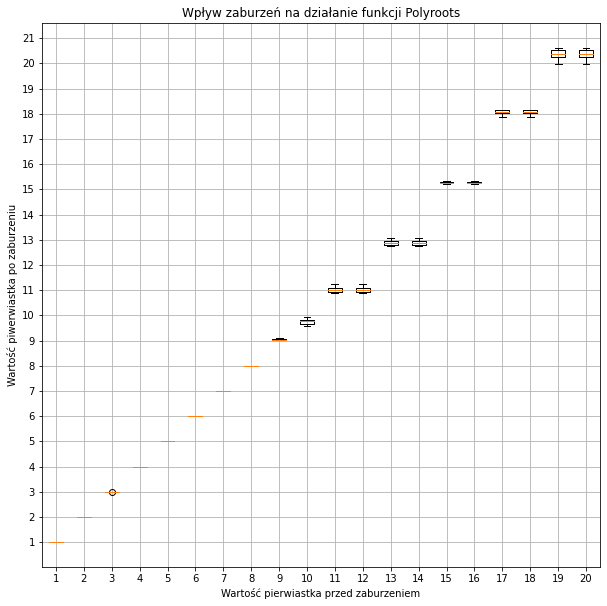

In [2]:
vector_coef = np.arange(1,21)
polyno = main.polly_A(vector_coef)

iter_roots = []
for i in range(21):
    coef, samp_roots = main.roots_20(polyno)
    iter_roots.append(samp_roots)
    polyno = coef
    
iter_roots = np.array(iter_roots)

plt.figure(figsize=(10,10))
plt.boxplot(np.real(iter_roots))
plt.yticks(np.arange(1, 22, 1))

plt.grid()
plt.title("Wpływ zaburzeń na działanie funkcji Polyroots")
plt.ylabel("Wartość piwerwiastka po zaburzeniu")
plt.xlabel("Wartość pierwiastka przed zaburzeniem")
plt.show()

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

In [9]:
vect_coef = main.polly_A(np.array([1,1,1,1,1,1,1,1]))

frob_function = main.frob_a(vect_coef[:-1])
schur = frob_function[2]
schur =  np.diag(schur[0])

print('Postać Frobenusa macierzy:\n\n{0}\n'.format(frob_function[0]))
print('Wartości własne macierzy Frobeniusa czyli rozwiązania naszego wielomianu:\n\n{0}\n'.format(frob_function[1]))
print('Rozkład Schura macierzy Frobenusa:\n\n{0}\n'.format(frob_function[2]))
print("Rozwiązania wielomianu korzystając z funkcji polyroots ktorą zastosowałem w main w funkcji frob_a:\n\n{0}\n"\
      .format(frob_function[3]))

print("Poprawne użycie funkcji polyroots:\n\n{0}".format(P.polyroots(vect_coef)))

Postać Frobenusa macierzy:

[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]

Wartości własne macierzy Frobeniusa czyli rozwiązania naszego wielomianu:

[1.01904739+0.00796691j 1.01904739-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]

Rozkład Schura macierzy Frobenusa:

(array([[ 1.01798620e+00, -4.43722411e-01, -2.70223682e-01,
        -9.23108070e-01, -1.43763057e+00, -3.54593543e+00,
        -9.97914626e+00, -4.12474910e+01],
       [ 0.00000000e+00,  1.01272357e+00,  1.01218994e+00,
         8.27677960e-01,  2.40178497e+00,  4.93649158e+00,
         1.44569499e+01,  5.94408141e+01],
   

##### Komentarz:
Ponieważ funkcja frob_a (zaimplementowana w mainie) została napisana w taki sposób, że nie bierze ostatniego współczynnika odwróconego wielomianu, wyliczanie z tego wektora pierwiastków funkcją polyroots (z numpy) daje zupełnie błędne rozwiązania, dlatego jak widać w powyższym kodzie jeszcze raz wywołałem funkcję polyroots dla właściwego wektora współczynników.

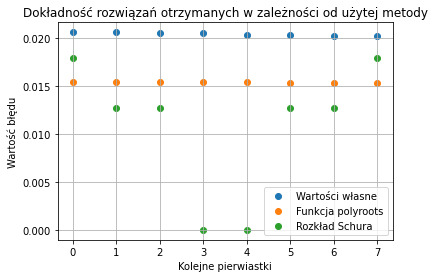

In [11]:
vector_to_plot = np.arange(8)
eigen_norm = [np.abs(i-1) for i in frob_function[1]]
roots_norm = [np.abs(i-1) for i in P.polyroots(vect_coef)]
schur_norm = [np.abs(i-1) for i in schur]
plt.figure()
plt.scatter(vector_to_plot,eigen_norm,label = "Wartości własne")
plt.scatter(vector_to_plot,roots_norm,label = "Funkcja polyroots")
plt.scatter(vector_to_plot,schur_norm,label = "Rozkład Schura")
plt.legend(loc = 'lower right')
plt.title("Dokładność rozwiązań otrzymanych w zależności od użytej metody")
plt.xlabel('Kolejne pierwiastki')
plt.ylabel('Wartość błędu')
plt.grid()

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


Miejsca zerowe obliczone za pomocą wartości własnych macierzy Frobenusa:

[ 0.        +1.41421356e+00j  0.        -1.41421356e+00j
 -0.33333333+0.00000000e+00j  0.66667174+0.00000000e+00j
  0.66666413+4.39477175e-06j  0.66666413-4.39477175e-06j
  0.33333333+0.00000000e+00j]


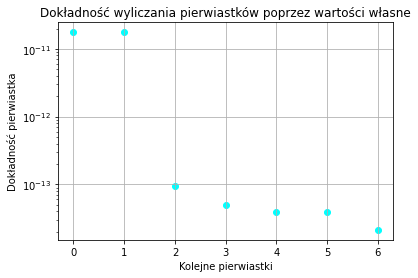

Miejsca zerowe obliczone za pomocą rozkładu Schura:

[-2.63677968e-16 -2.63677968e-16 -3.33333333e-01  6.66675355e-01
  6.66662323e-01  6.66662323e-01  3.33333333e-01]


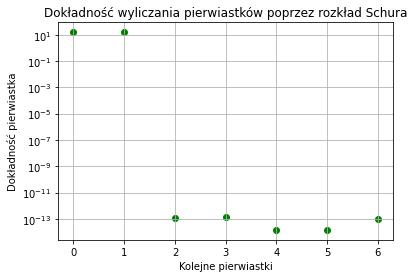

Miejsca zerowe obliczone pomocą funkcji polyroots:

[-3.33333333e-01+0.00000000e+00j -1.11022302e-16-1.41421356e+00j
 -1.11022302e-16+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66664771e-01-3.28271360e-06j  6.66664771e-01+3.28271360e-06j
  6.66670457e-01+0.00000000e+00j]


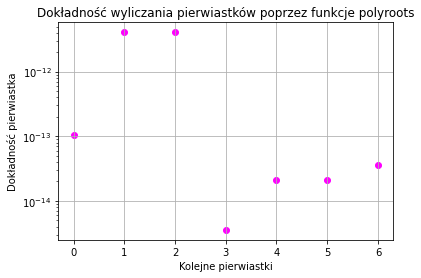

In [20]:
w2 = np.array([243,-486,783,-990,558,-28,-72,16])
w2_rev = w2[::-1]
w2_rev = w2_rev[:-1]
w2_rev = w2_rev/243

frob_vector = main.frob_a(w2_rev)
eigen_roots = frob_vector[1]
poly_roots = P.polyroots(w2[::-1])
schur = frob_vector[2]
schur = np.diag(schur[0])

w2x = lambda x: 243*x**7 - 486*x**6 + 783*x**5 - 990*x**4 + 558*x**3 - 28*x**2 -72*x + 16


print("Miejsca zerowe obliczone za pomocą wartości własnych macierzy Frobenusa:\n\n{0}".format(eigen_roots))

plt.figure()
for i in range(len(eigen_roots)):
    plt.scatter(i, np.abs(w2x(eigen_roots[i])), color = 'cyan')
plt.grid()
plt.title('Dokładność wyliczania pierwiastków poprzez wartości własne')
plt.semilogy()
plt.ylabel('Dokładność pierwiastka')
plt.xlabel('Kolejne pierwiastki')
plt.show()


print("Miejsca zerowe obliczone za pomocą rozkładu Schura:\n\n{0}".format(schur))

plt.figure()
for i in range(len(schur)):
    plt.scatter(i, np.abs(w2x(schur[i])), color = 'green')
plt.title('Dokładność wyliczania pierwiastków poprzez rozkład Schura')
plt.semilogy()
plt.grid()
plt.ylabel('Dokładność pierwiastka')
plt.xlabel('Kolejne pierwiastki')    
plt.show()


print("Miejsca zerowe obliczone pomocą funkcji polyroots:\n\n{0}".format(poly_roots))

plt.figure()
for i in range(len(poly_roots)):
    plt.scatter(i, np.abs(w2x(poly_roots[i])), color = 'magenta')
plt.title('Dokładność wyliczania pierwiastków poprzez funkcje polyroots')
plt.semilogy()
plt.grid()
plt.ylabel('Dokładność pierwiastka')
plt.xlabel('Kolejne pierwiastki')
plt.show()

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

Pierwiastki obliczone za pomocą funkcji cheb_roots:
[ -2.1113158   -1.01778383   1.01798385   2.11432153 155.99679425]


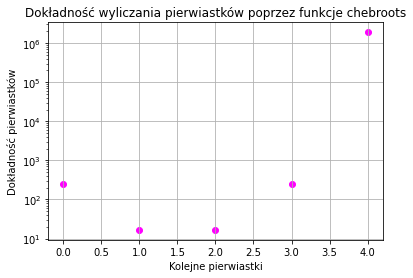


Pierwiastki obliczone za pomocą funkcji polyroots:
[ -2.  -1.   1.   2. 156.]


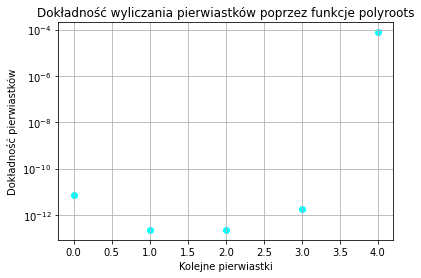

In [29]:
x = [-624,4,780,-5,-156,1] 
a0,a1,a2,a3,a4,a5 = x

cheb_roots = cheb.chebroots(((a0 + a2/2 + 3*a4/4),(a1 + 3*a3/4 + 5*a5/8),(a2/2 + a4/4),\
                             (a3/4 + 5*a5/16),(a4/8),(a5/16)))
poly_roots = P.polyroots(x)

w3 = lambda x: x**5 - 156*x**4 - 5*x**3 + 780*x**2 + 4*x - 624


print("Pierwiastki obliczone za pomocą funkcji cheb_roots:\n{0}".format(cheb_roots))

plt.figure()
for i in range(len(cheb_roots)):
    plt.scatter(i,np.abs(w3(cheb_roots[i])),color = 'magenta')
plt.semilogy()
plt.grid()
plt.title('Dokładność wyliczania pierwiastków poprzez funkcje chebroots')
plt.xlabel('Kolejne pierwiastki')
plt.ylabel('Dokładność pierwiastków')
plt.show()


print("\nPierwiastki obliczone za pomocą funkcji polyroots:\n{0}".format(poly_roots))

plt.figure()
for i in range(len(poly_roots)):
    plt.scatter(i,np.abs(w3(poly_roots[i])),color = 'cyan')
plt.grid()
plt.semilogy()
plt.title('Dokładność wyliczania pierwiastków poprzez funkcje polyroots')
plt.xlabel('Kolejne pierwiastki')
plt.ylabel('Dokładność pierwiastków')
plt.show()

### Wnioski:

Zad. 1: Po analizie wykresu można stwierdzić, że pierwiastki 1-9 są odporne na zaburzenia. Najbardziej podatny na zaburzenia wydaje się być pierwiastek 19. Miejsca zerowe powyżej 13 w góre są parami identyczne, ponieważ są to sprzężenia pierwiastków zespolonych.

Zad. 2: Porównując  sposoby wyznaczenia pierwiastków,  dochodzimy do wniosku, że to rozkład Schura jest w tym przypadku najskuteczniejszą metodą, drugą okazała się funkcja polyroots, a sposób z macierzą Frobenusa miał najsłabsze, choć zadowalające wyniki. Przy używaniu tych funkcji trzeba pamiętać, by do funkcji polyroots przekazywać cały wektor współczynników, a do macierzy Frobenusa wektor był obcięty.

Zad. 3: Obliczanie pierwiastków zarówno za pomocą funkcji polyroots jak i z wartości własnych macierzy Forbenusa daje zbliżone wyniki, natomiast rozkład Schura zdecydowanie odstaje w tym przypadku, głównie przez niedokladność 2 pierwszych pierwiastków.

Zad. 4: Na pierwszy rzut oka, otrzymane pierwiastki są do siebie zbliżone, co powinno dobrze świadczyć o funkcji chebroots, jednak jeśli dokładniej przyjrzymy się otrzymanym wynikom i wstawimy je do naszej funkcji możemy zobaczyć, że funkcja chebroots generuje duże błędy, co sprawia, że to nie jest optymalna metoda.